In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Let's start by reading the Bitcoin and Ether data:


In [40]:
df=pd.read_csv(
    'data/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [41]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


let's run simple visualization:

<Axes: xlabel='Timestamp'>

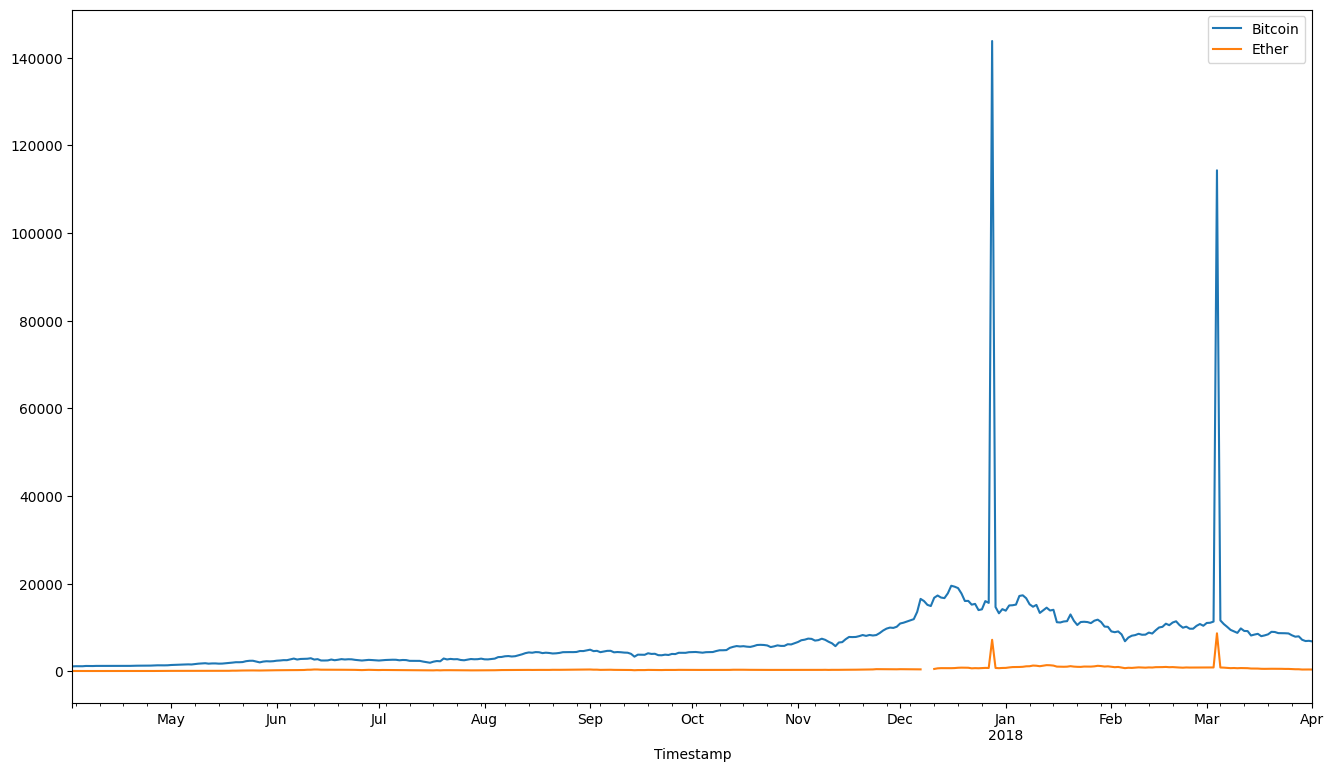

In [42]:
df.plot(figsize=(16,9))

<Axes: xlabel='Timestamp'>

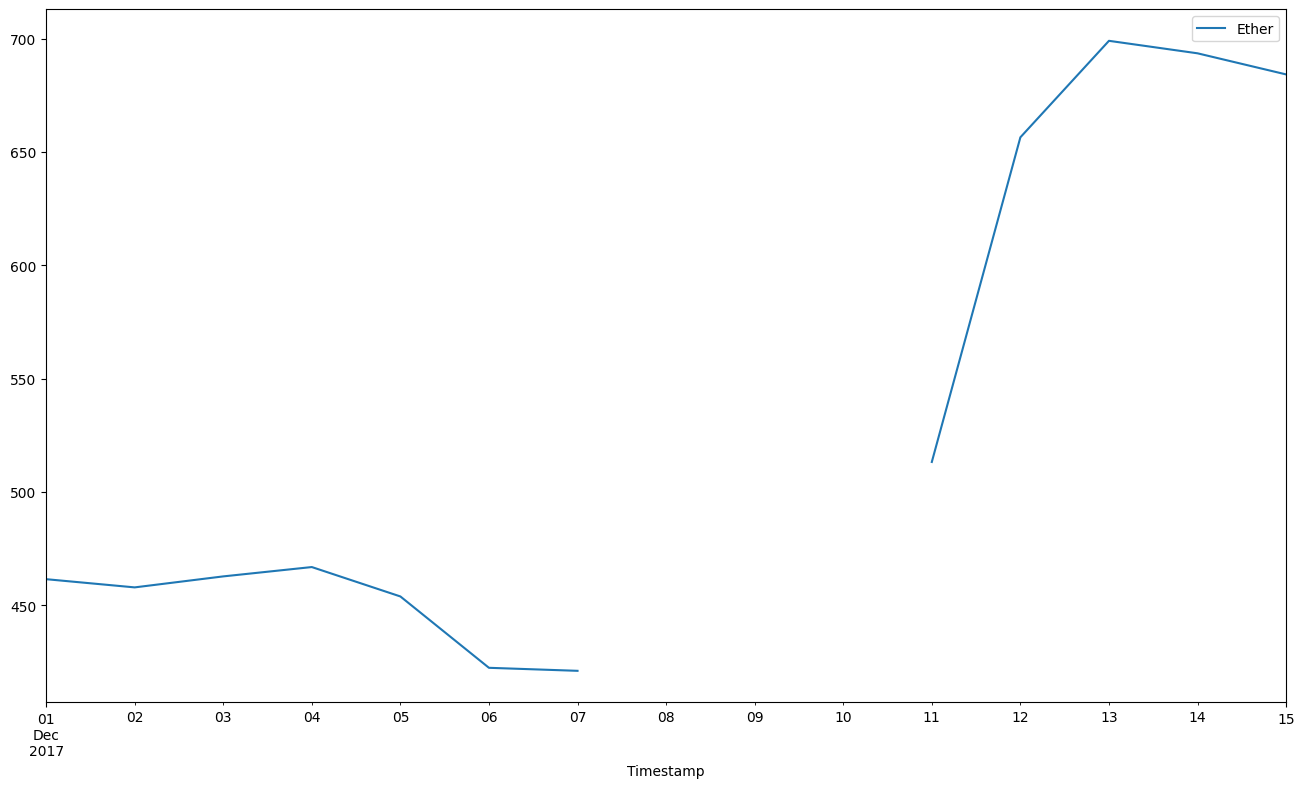

In [43]:
df.loc['2017-12':'2017-12-15'].plot(y='Ether',figsize=(16,9))

In [44]:
df_na=df.loc['2017-12':'2017-12-15']

df_na

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN


In [45]:
df_na['Ether'].isnull().values.any() #you can use isna() also

True

In [46]:
df_na[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


let's add a little bit more context:

In [47]:
df.loc['2017-12-06':'2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values. Drop them? fill them? If we decide to fill them, what will we use as fill value? For now, let's consider the price of the ether remained constant.

In [48]:
df.loc['2017-12-06':'2017-12-12'].ffill()

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,421.15
2017-12-09,15142.834152,421.15
2017-12-10,14869.805000,421.15
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [49]:
df.ffill(inplace=True)

let's take a look now:

<Axes: xlabel='Timestamp'>

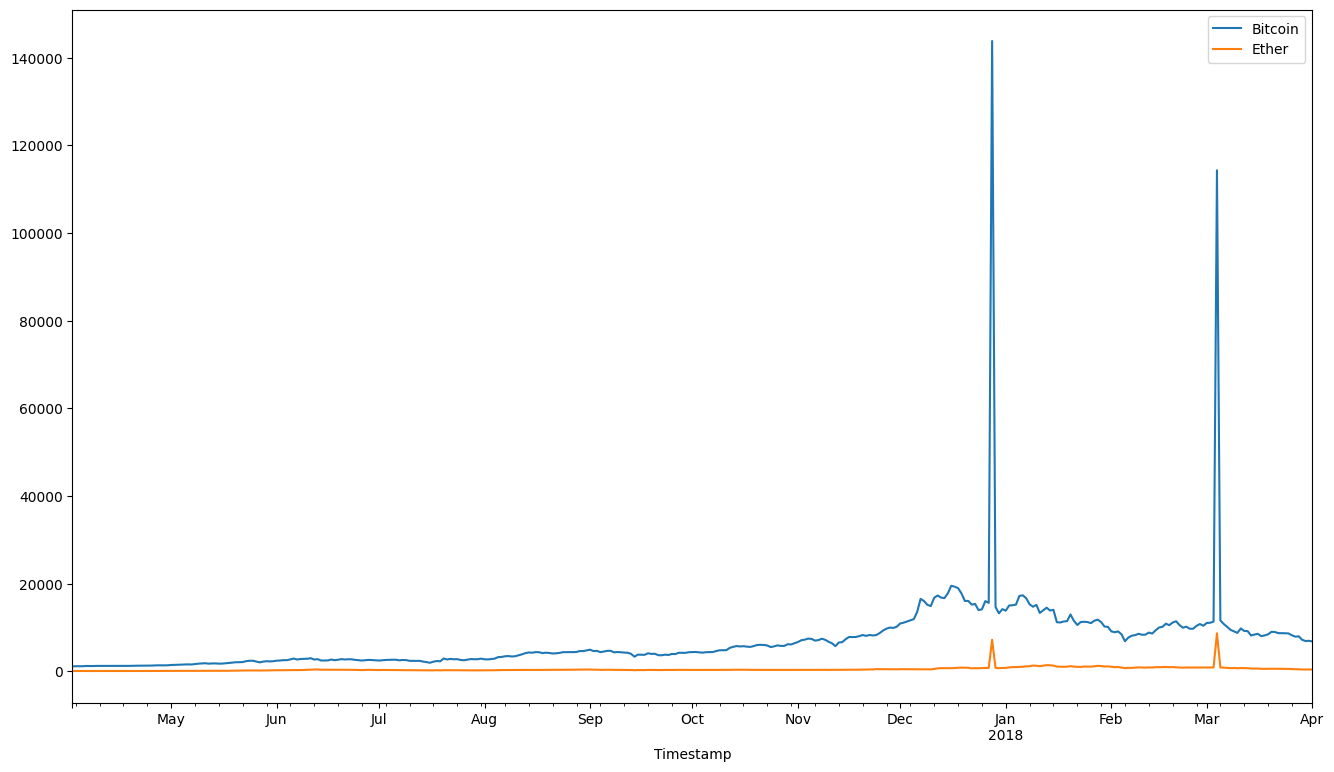

In [50]:
df.plot(figsize=(16,9))

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of `Dec 2017` and first of `March 2018`.

<Axes: xlabel='Timestamp'>

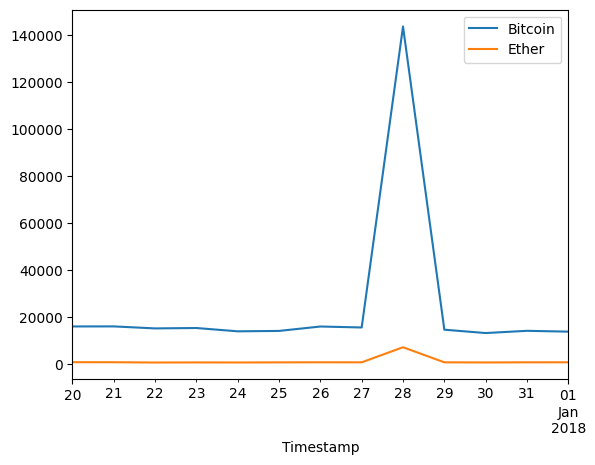

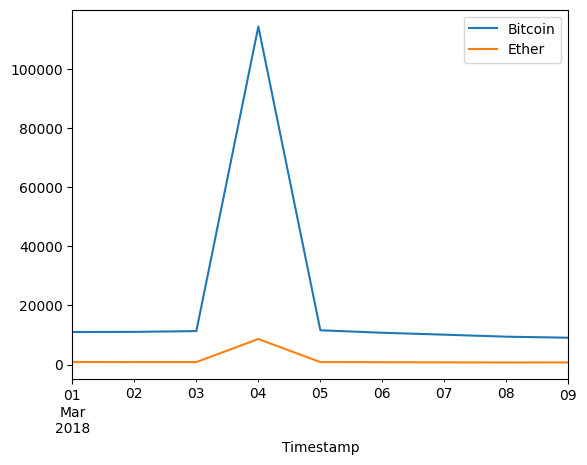

In [62]:

df.loc['2017-12-20':'2018-01-01'].plot()
df.loc['2018-03':'2018-03-09'].plot()

In [71]:
df_cleaned=df.drop(index=['2017-12-28','2018-03-04'])

<Axes: xlabel='Timestamp'>

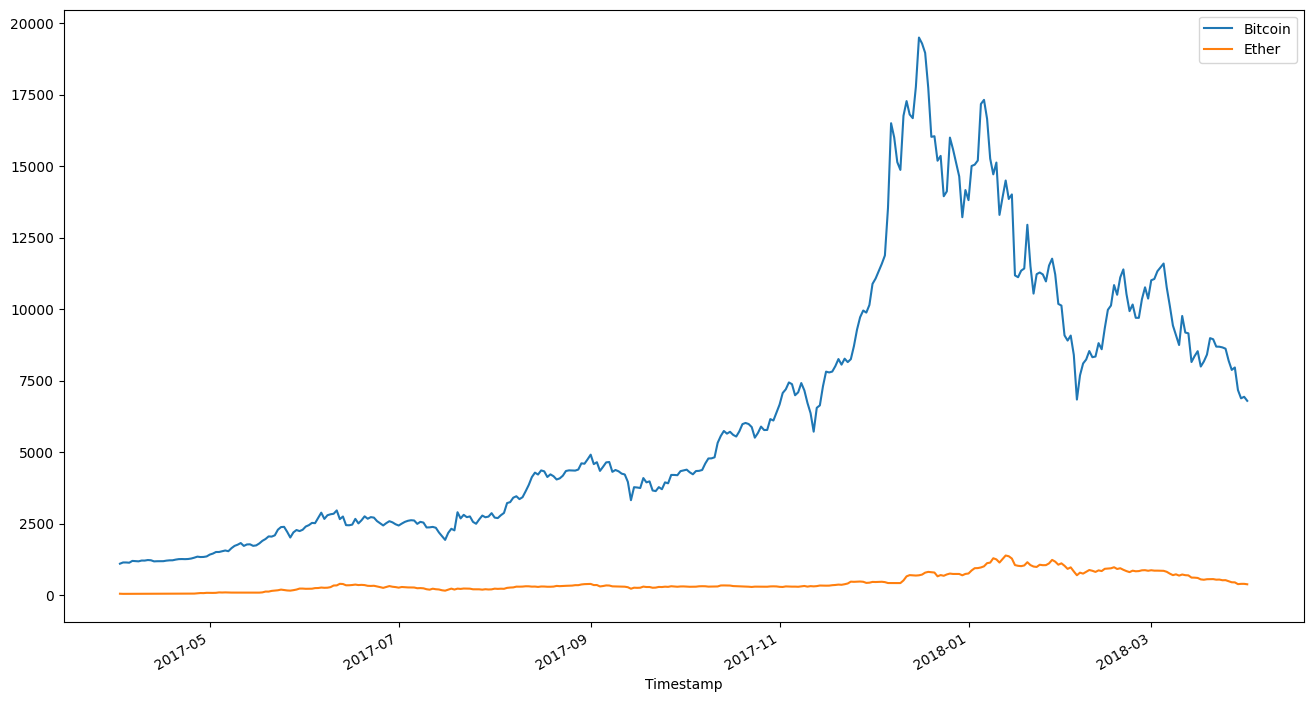

In [72]:
df_cleaned.plot(figsize=(16,9))